# Import Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read & explore dataset

In [24]:
df = pd.read_csv("C:/Users/BH/Downloads/globalterrorismdb_0718dist.csv", low_memory=False, encoding="latin-1")
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [25]:
df.shape

(181691, 135)

In [26]:
df["eventid"].unique().shape


(181691,)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [27]:
df.count()

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [28]:
df.isnull().sum()


eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [29]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

<AxesSubplot:>

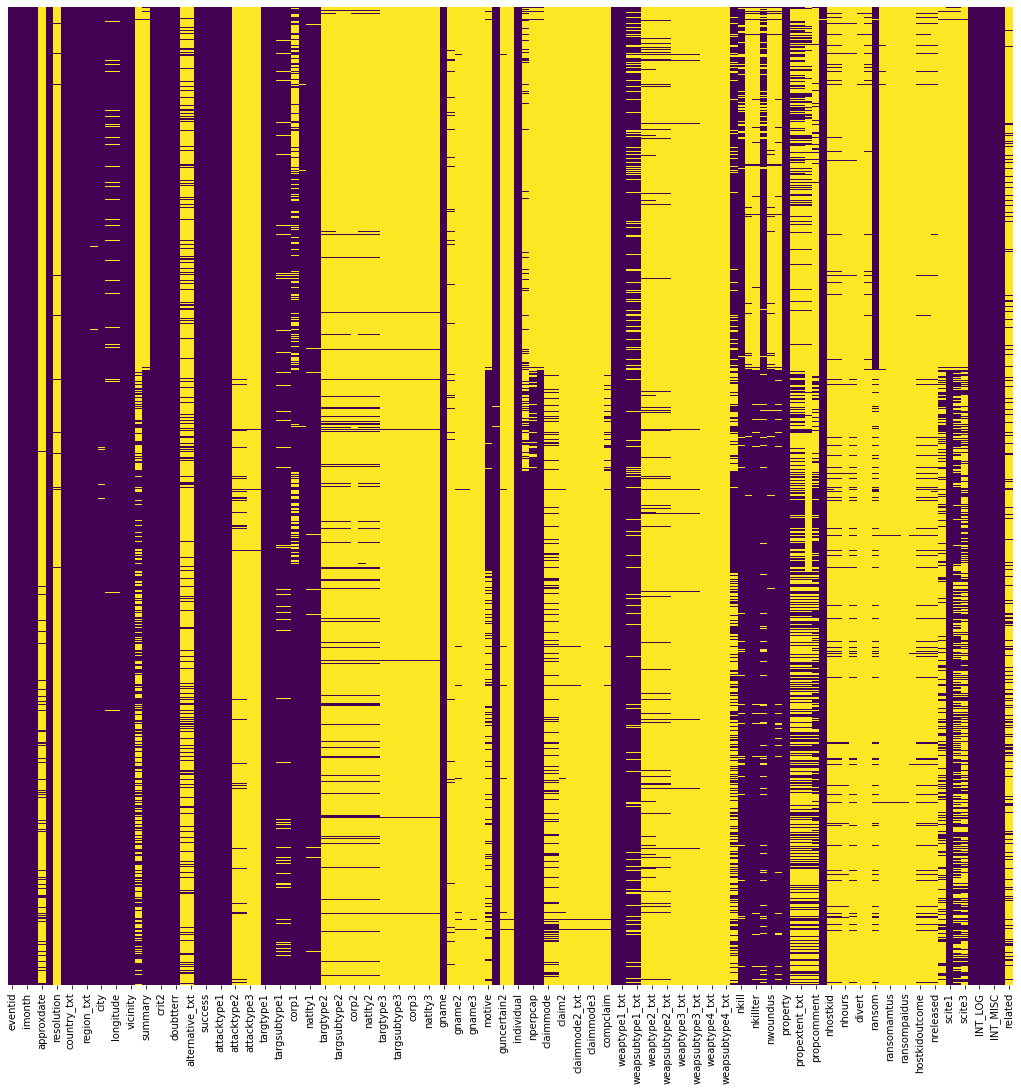

In [30]:
plt.figure(figsize=(18, 18))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [31]:
df.dropna(axis=1, inplace=True)

In [32]:
df.shape

(181691, 29)

In [33]:
df.corr()


,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.070646,0.002019,0.026215,...,0.137743,0.074173,0.079080,0.017939,-0.011716,-0.278927,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.070659,0.001995,0.026211,...,0.137736,0.074153,0.079082,0.017944,-0.011737,-0.278916,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.004501,0.001568,0.001734,...,0.003071,0.006705,-0.000948,-0.001661,0.007863,-0.005816,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.005367,0.011434,-0.002702,...,0.003593,-0.005333,-0.000052,-0.003788,-0.003019,-0.003903,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.017784,-0.015029,0.001249,...,-0.033961,0.272272,0.011613,-0.008929,0.207802,-0.002096,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.012291,-0.006646,-0.038480,...,-0.050360,-0.021384,-0.019703,0.027918,-0.023708,0.032051,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.073678,0.025521,-0.013163,...,0.112672,0.007642,0.041396,-0.059963,0.013257,-0.183279,-0.082584,-0.071917,0.043139,-0.047900
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,1.000000,0.003330,-0.000534,...,0.008352,0.006504,0.024644,-0.011986,0.001496,-0.019811,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.003330,1.000000,-0.008984,...,0.019039,0.027544,-0.040026,-0.025591,0.029257,-0.007595,0.089973,0.089888,0.015692,0.082288
crit2,0.026215,0.026211,0.001734,-0.002702,0.001249,-0.038480,-0.013163,-0.000534,-0.008984,1.000000,...,0.002770,0.005157,-0.101522,0.003311,-0.008549,-0.002711,-0.024153,-0.023829,-0.012980,-0.027752


# Visualization of Data

Text(0.5, 1.0, 'Increase in Terror')

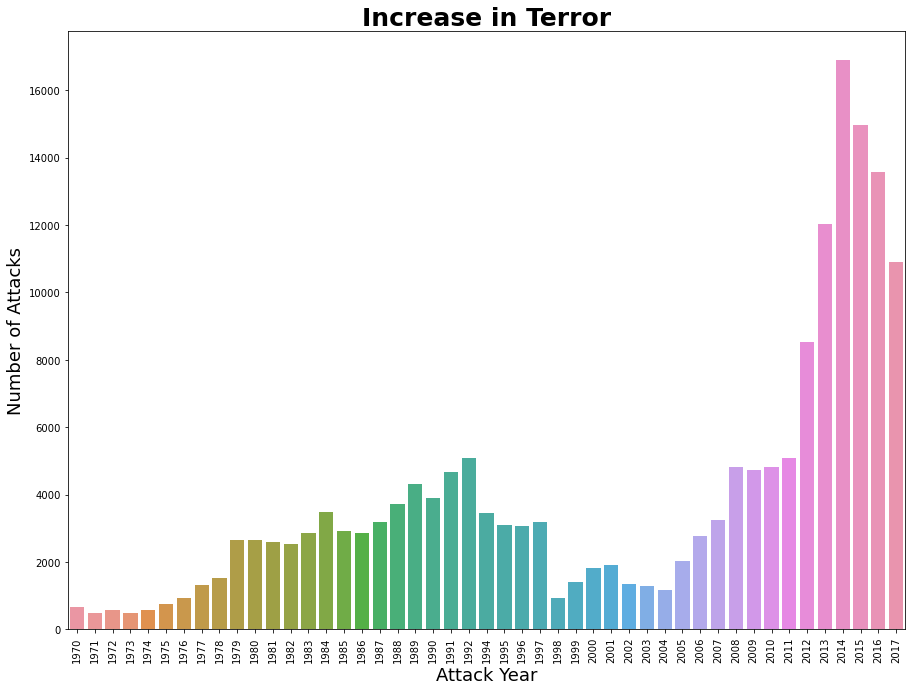

In [34]:
plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df["iyear"])
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Year", fontsize=18)
plt.title("Increase in Terror", size=25, fontweight="bold")


Text(0.5, 1.0, 'Increase in Terror')

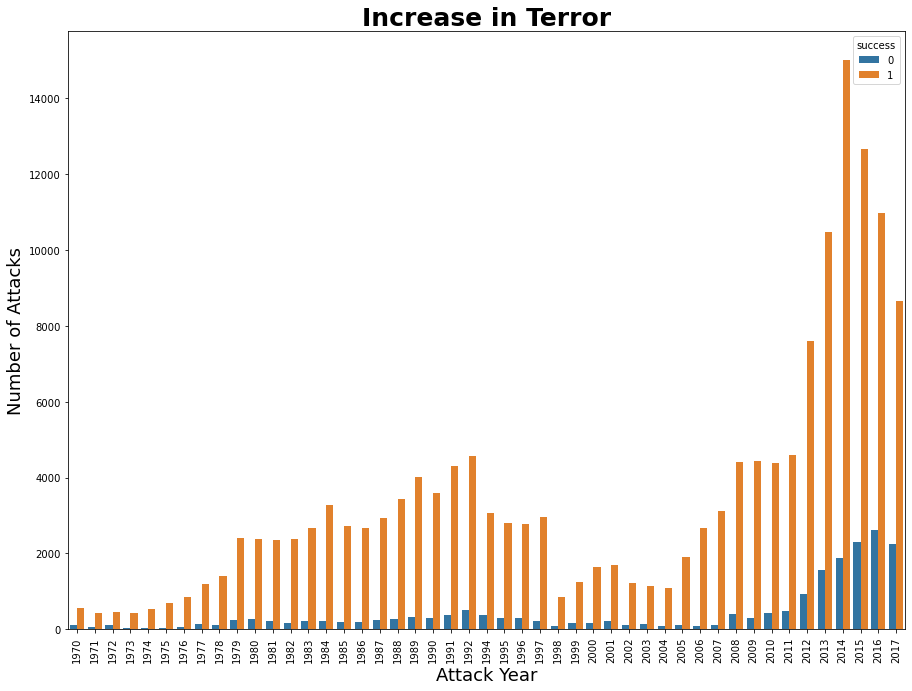

In [35]:
plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df["iyear"], hue="success", data=df)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Year", fontsize=18)
plt.title("Increase in Terror", size=25, fontweight="bold")

Text(0.5, 0, 'Attack Region')

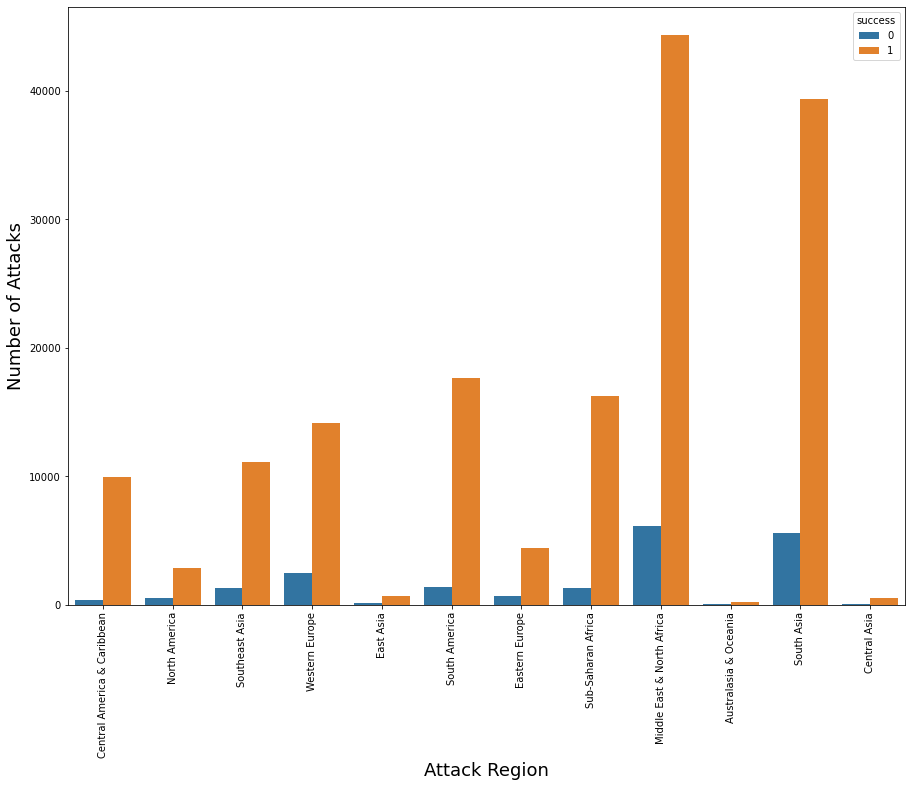

In [36]:
plt.rcParams["figure.figsize"] = 15, 11
sns.countplot(x = df["region_txt"], hue="success", data=df)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Region", fontsize=18)

Text(0.5, 1.0, 'Country wise Attacks')

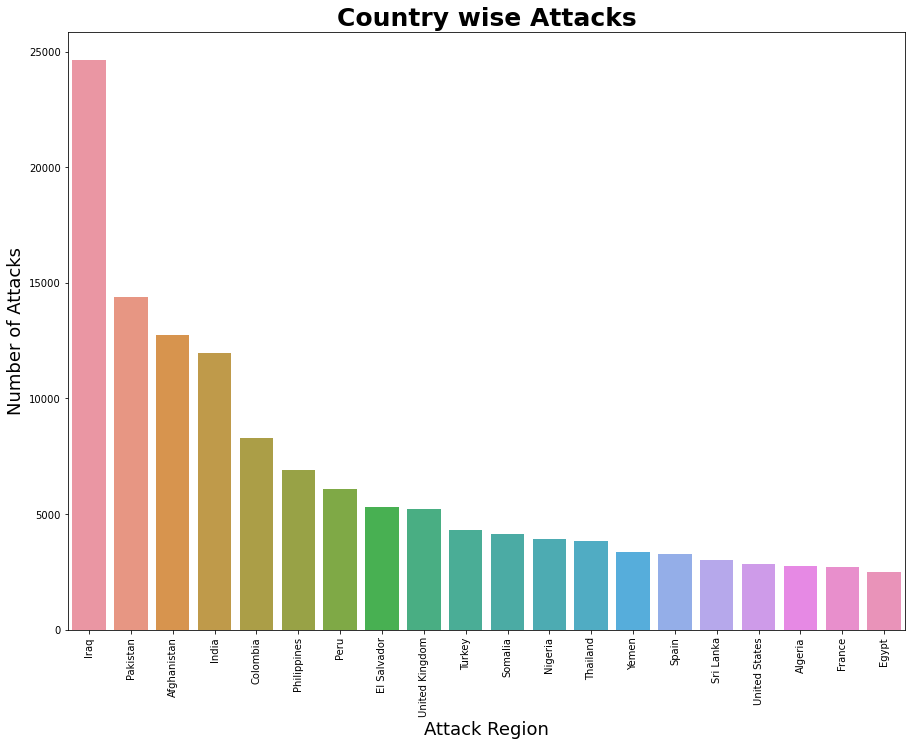

In [37]:
plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["country_txt"].value_counts()[:20].index, y=df["country_txt"].value_counts()[:20].values)
plt.ylabel("Number of Attacks", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Region", fontsize=18)
plt.title("Country wise Attacks", size=25, fontweight="bold")

Text(0.5, 1.0, 'Attacks Types')

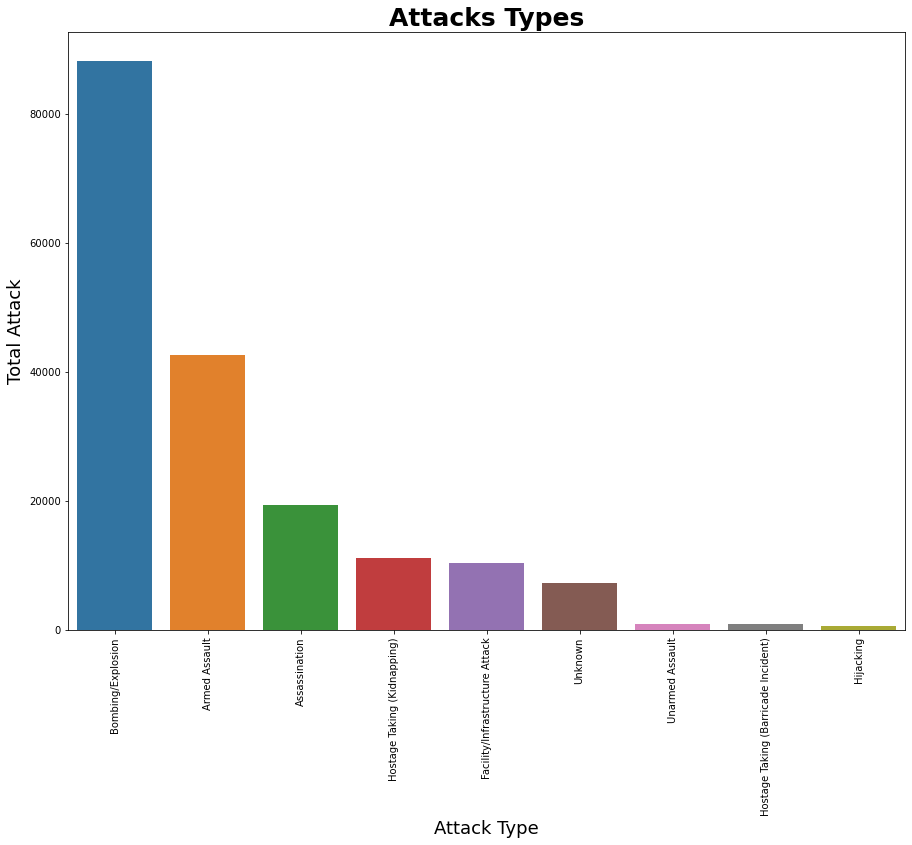

In [21]:
plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["attacktype1_txt"].value_counts()[:20].index, y=df["attacktype1_txt"].value_counts()[:20].values)
plt.ylabel("Total Attack", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Type", fontsize=18)
plt.title("Attacks Types", size=25, fontweight="bold")

Text(0.5, 1.0, 'Attacks Group')

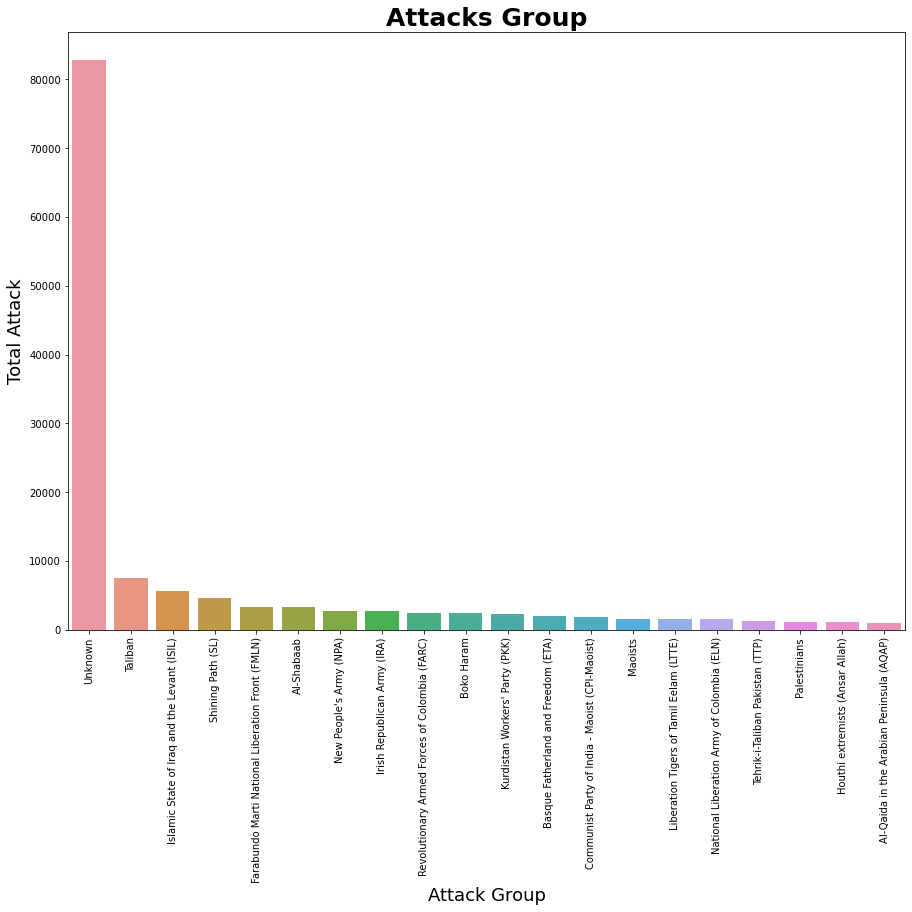

In [38]:
plt.rcParams["figure.figsize"] = 15, 11
sns.barplot(x = df["gname"].value_counts()[:20].index, y=df["gname"].value_counts()[:20].values)
plt.ylabel("Total Attack", fontsize=18)
plt.xticks(rotation=90)
plt.xlabel("Attack Group", fontsize=18)
plt.title("Attacks Group", size=25, fontweight="bold")

# Conclusion

Iraq is ranked first on Global Terrorism activity followed by Pakistan, Afganistan, India etc...

Middle East & North Africa is the region with most attacks.

Most targeted areas are private citizens and infrastructure, military, police etc...

Global Terror attacks rose sharply since 2012

Year with most terrorist attacks: 2014

Most attack types: Bombing/Explosion

Taliban is the known group with most attacks.